# Lab Notebook: Gamma Ray Spectroscopy
##### by Aidan Garcia, Andre Rojas, Daniel Mazin, and Jessica Paredes
-------------------------------------------------------


$$ \text{Equation for gaussian fit: }f(x) = Ae^{-\frac{(x-B)^2}{2C^2}} + D$$

$$ \text{Equation for multiple gaussian fits: }f(x) = A_{1}e^{-\frac{(x-B_{1})^2}{2C_{1}^2}} + A_{2}e^{-\frac{(x-B_{2})^2}{2C_{2}^2}} + \text{ . . . } + D$$

Where $A$ is the amplitude/count of the peak, $B$ is the mean/channel number, $C$ is the standard deviation/width of the gaussian fit, and $D$ is a vertical offset.  

In [1]:
import numpy as np 
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

def fgaussian(x, A, B, C, D):
    return A * np.exp(-((x - B) ** 2) / (2 * C ** 2)) + D

def ftwogaussian(x, A1, A2, B1, B2, C1, C2, D):
    return (A1 * np.exp(-((x - B1) ** 2) / (2 * C1 ** 2)) 
            + A2 * np.exp(-((x - B2) ** 2) / (2 * C2 ** 2)) + D)

def is_float(string): 
    try:
        float(string)
        return True
    except ValueError:
        return False
    
data1 = np.genfromtxt('data3_Ba_133.csv', delimiter=',', skip_header=22, dtype=str)
data2 = np.genfromtxt('data_cd_109.csv', delimiter=',', skip_header=22, dtype=str)
data3 = np.genfromtxt('data_Co_57.csv', delimiter=',', skip_header=22, dtype=str)
data4 = np.genfromtxt('data_co-60.csv', delimiter=',', skip_header=22, dtype=str)
data5 = np.genfromtxt('data2_Mn-54.csv', delimiter=',', skip_header=22, dtype=str)
data6 = np.genfromtxt('data_Na_22.csv', delimiter=',', skip_header=22, dtype=str)
data7 = np.genfromtxt('data_unknown.csv', delimiter=',', skip_header=22, dtype=str)

x_data_1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data1]
y_data_1 = [float(row[2]) if is_float(row[2]) else np.nan for row in data1]
x_data_2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data2]
y_data_2 = [float(row[2]) if is_float(row[2]) else np.nan for row in data2]
x_data_3 = [float(row[0]) if is_float(row[0]) else np.nan for row in data3]
y_data_3 = [float(row[2]) if is_float(row[2]) else np.nan for row in data3]
x_data_4 = [float(row[0]) if is_float(row[0]) else np.nan for row in data4]
y_data_4 = [float(row[2]) if is_float(row[2]) else np.nan for row in data4]
x_data_5 = [float(row[0]) if is_float(row[0]) else np.nan for row in data5]
y_data_5 = [float(row[2]) if is_float(row[2]) else np.nan for row in data5]
x_data_6 = [float(row[0]) if is_float(row[0]) else np.nan for row in data6]
y_data_6 = [float(row[2]) if is_float(row[2]) else np.nan for row in data6]
x_data_7 = [float(row[0]) if is_float(row[0]) else np.nan for row in data7]
y_data_7 = [float(row[2]) if is_float(row[2]) else np.nan for row in data7]

# Ba-133:

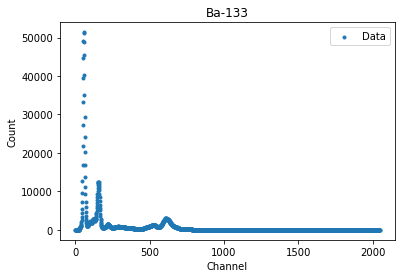

In [2]:
plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133')
plt.legend()
plt.show()

### Peak 1 - 0.81 MeV

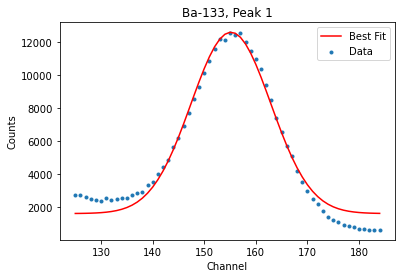

Peak 1 (0.081 MeV):

A1 = 11010.63462982 ± 225.09684517
B1 = 155.16810774 ± 0.16372205
C1 = 7.72896483 ± 0.21445497
D = 1610.60213742 ± 140.02229188


In [3]:
# peak 1

x_min = 125
x_max = 185
A1 = 8000
B1 = 162
C1 = 5
D = 5000

params, covariance = curve_fit(fgaussian, x_data_1[x_min:x_max], y_data_1[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1[x_min:x_max], y_data_1[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_1[x_min:x_max], fgaussian(x_data_1[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Ba-133, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.081 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2 and Peak 3 - 0.276 MeV and 0.303 MeV

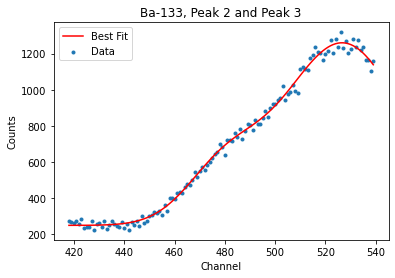

Peak 2 (0.276 MeV) and Peak 3 (0.303 MeV):

A2 = 288.54223840 ± 37.74270071
B2 = 479.72620940 ± 7.95216302
C2 = 15.12047055 ± 1.56706196
A3 = 1007.27912712 ± 7.95216302
B3 = 526.84697657 ± 0.47711423
C3 = 24.19774370 ± 1.48193441
D = 250.18326773 ± 0.47711423


In [4]:
# peak 2 and peak 3

x_min = 418
x_max = 540
A1 = 500
B1 = 480
C1 = 7
A2 = 1000
B2 = 520
C2 = 15
D = 200

params, covariance = curve_fit(ftwogaussian, x_data_1[x_min:x_max], y_data_1[x_min:x_max], 
                               p0=[A1, A2, B1, B2, C1, C2, D])

A1_fit, A2_fit, B1_fit, B2_fit, C1_fit, C2_fit, D_fit = params

uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1[x_min:x_max], y_data_1[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_1[x_min:x_max], ftwogaussian(x_data_1[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Ba-133, Peak 2 and Peak 3')
plt.legend()
plt.show()

print('Peak 2 (0.276 MeV) and Peak 3 (0.303 MeV):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'A3 = {A2_fit:.8f} ± {uncert[1]:.8f}')
print(f'B3 = {B2_fit:.8f} ± {uncert[3]:.8f}')
print(f'C3 = {C2_fit:.8f} ± {uncert[5]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 4 and Peak 5 - 0.356 MeV and 0.384 MeV

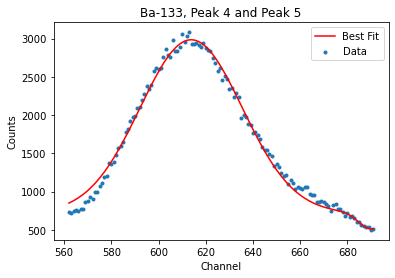

Peak 4 (0.356 MeV) and Peak 5 (0.384 MeV):

A4 = 2265.91768629 ± 25.16298012
B4 = 613.82722775 ± 0.17468657
C4 = 21.69996565 ± 0.34551434
A5 = -212.18295600 ± 49.28970214
B5 = 690.00512348 ± 3.58939626
C5 = -5.14962414 ± 2.85404121
D = 717.99936917 ± 25.00022655


In [5]:
# peak 4 and peak 5

x_min = 562
x_max =692

params, covariance = curve_fit(ftwogaussian, x_data_1[x_min:x_max], y_data_1[x_min:x_max], p0=[2700, 600, 600, 650, 25, 25, 100]) # peak 3

A1_fit, A2_fit, B1_fit, B2_fit, C1_fit, C2_fit, D_fit = params

uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1[x_min:x_max], y_data_1[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_1[x_min:x_max], ftwogaussian(x_data_1[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Ba-133, Peak 4 and Peak 5')
plt.legend()
plt.show()

print('Peak 4 (0.356 MeV) and Peak 5 (0.384 MeV):')
print()
print(f'A4 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B4 = {B1_fit:.8f} ± {uncert[2]:.8f}')
print(f'C4 = {C1_fit:.8f} ± {uncert[4]:.8f}')
print(f'A5 = {A2_fit:.8f} ± {uncert[1]:.8f}')
print(f'B5 = {B2_fit:.8f} ± {uncert[3]:.8f}')
print(f'C5 = {C2_fit:.8f} ± {uncert[5]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[6]:.8f}')

# Cd-109:

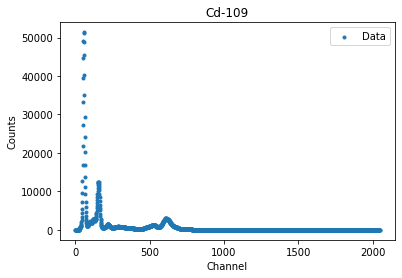

In [6]:
plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Cd-109')
plt.legend()
plt.show()

### Peak 1 - 0.088 MeV

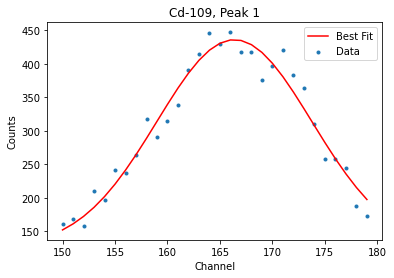

Peak 1 (0.088 MeV):

A1 = 310.65919657 ± 23.17780837
B1 = 166.37276477 ± 0.21175686
C1 = 7.38593699 ± 0.64463580
D = 125.23336926 ± 25.08984323


In [7]:
# peak 1

x_min = 150
x_max = 180
A1 = 400
B1 = 162
C1 = 5
D = 130

params, covariance = curve_fit(fgaussian, x_data_2[x_min:x_max], y_data_2[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_2[x_min:x_max], y_data_2[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_2[x_min:x_max], fgaussian(x_data_2[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Cd-109, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.088 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Co-57:

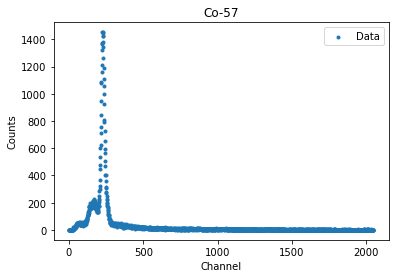

In [8]:
plt.scatter(x_data_3, y_data_3, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Co-57')
plt.legend()
plt.show()

### Peak 1 - 0.122 MeV

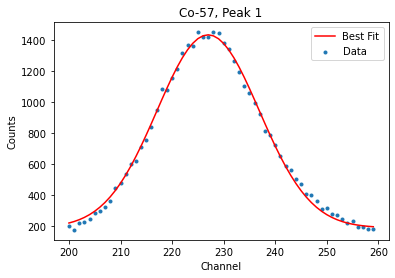

Peak 1 (0.122 MeV):

A1 = 1246.53749882 ± 10.47138802
B1 = 226.98617824 ± 0.07422393
C1 = 9.92052531 ± 0.12089254
D = 188.79702245 ± 8.96864587


In [9]:
# peak 1

x_min = 200
x_max = 260
A1 = 1400
B1 = 225
C1 = 10
D = 20

params, covariance = curve_fit(fgaussian, x_data_3[x_min:x_max], y_data_3[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_3[x_min:x_max], y_data_3[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_3[x_min:x_max], fgaussian(x_data_3[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Co-57, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.122 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Co-60:

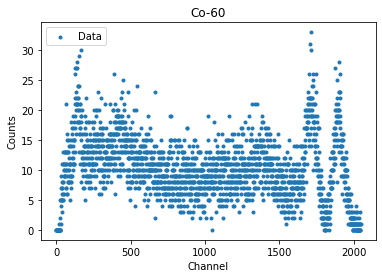

In [10]:
plt.scatter(x_data_4, y_data_4, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Co-60')
plt.legend()
plt.show()

### Peak 1 - 1.175 MeV

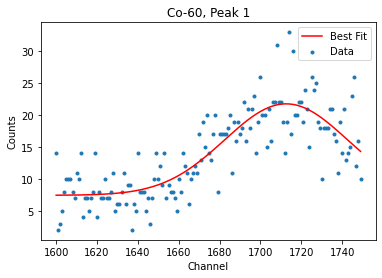

Peak 1 (1.175 MeV):

A1 = 14.34342430 ± 0.79896493
B1 = 1712.56931386 ± 1.77457388
C1 = 30.07052036 ± 2.54470361
D = 7.43023438 ± 0.61513753


In [11]:
# peak 1

x_min = 1600
x_max = 1750
A1 = 200
B1 = 1680
C1 = 30
D = 95

params, covariance = curve_fit(fgaussian, x_data_4[x_min:x_max], y_data_4[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_4[x_min:x_max], y_data_4[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_4[x_min:x_max], fgaussian(x_data_4[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Co-60, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (1.175 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2 - 1.333 MeV

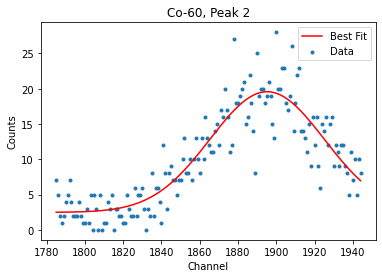

Peak 1 (1.333 MeV):

A2 = 17.09214139 ± 0.66420295
B2 = 1895.20371921 ± 1.07130561
C2 = 29.85102744 ± 1.57573790
D = 2.48301577 ± 0.51989860


In [12]:
# peak 2

x_min = 1785
x_max = 1945
A1 = 200
B1 = 1860
C1 = 37
D = 12

params, covariance = curve_fit(fgaussian, x_data_4[x_min:x_max], y_data_4[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_4[x_min:x_max], y_data_4[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_4[x_min:x_max], fgaussian(x_data_4[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Co-60, Peak 2')
plt.legend()
plt.show()

print('Peak 1 (1.333 MeV):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Mn-54:

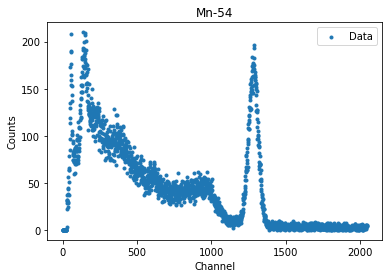

In [13]:
plt.scatter(x_data_5, y_data_5, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Mn-54')
plt.legend()
plt.show()

### Peak 1 - 0.835 MeV

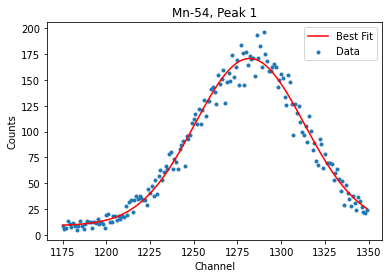

Peak 1 (0.835 MeV):

A1 = 161.51557925 ± 1.96977462
B1 = 1281.95949078 ± 0.32791821
C1 = 31.37023039 ± 0.52505007
D = 9.14964731 ± 1.68702859


In [14]:
# peak 2

x_min = 1175
x_max = 1350
A1 = 120
B1 = 1258
C1 = 30
D = 0

params, covariance = curve_fit(fgaussian, x_data_5[x_min:x_max], y_data_5[x_min:x_max], 
                               p0=[A1, B1, C1, D]) # peak 1

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_5[x_min:x_max], y_data_5[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_5[x_min:x_max], fgaussian(x_data_5[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Mn-54, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.835 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Na-22:

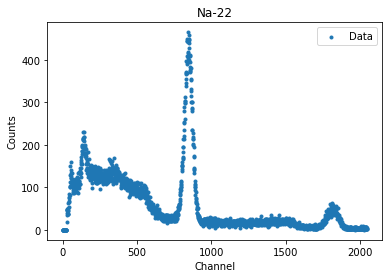

In [15]:
plt.scatter(x_data_6, y_data_6, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Na-22')
plt.legend()
plt.show()

### Peak 1 - 0.511 MeV

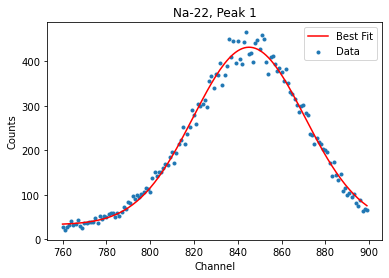

Peak 1 (0.511 MeV):

A1 = 398.77908539 ± 3.83484881
B1 = 845.18251807 ± 0.20642624
C1 = 25.47453498 ± 0.33650710
D = 32.57530785 ± 3.34131317


In [16]:
# peak 1

x_min = 760
x_max = 900
A1 = 400
B1 = 840
C1 = 30
D = 20

params, covariance = curve_fit(fgaussian, x_data_6[x_min:x_max], y_data_6[x_min:x_max], 
                               p0=[A1, B1, C1, D]) # peak 1

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_6[x_min:x_max], y_data_6[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_6[x_min:x_max], fgaussian(x_data_6[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Na-22, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.511 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2 - 1.115 MeV

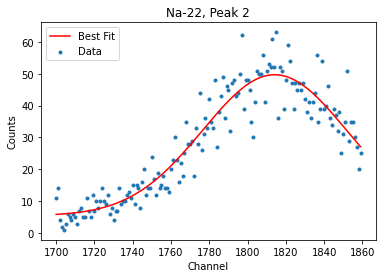

Peak 2 (1.115 MeV):

A2 = 44.25952847 ± 1.36312586
B2 = 1814.11727851 ± 1.01625214
C2 = 37.57728229 ± 1.72865721
D = 5.42079860 ± 1.28347904


In [17]:
# peak 2

x_min = 1700
x_max = 1860
A1 = 100
B1 = 1800
C1 = 30
D = 0

params, covariance = curve_fit(fgaussian, x_data_6[x_min:x_max], y_data_6[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_6[x_min:x_max], y_data_6[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_6[x_min:x_max], fgaussian(x_data_6[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Na-22, Peak 2')
plt.legend()
plt.show()

print('Peak 2 (1.115 MeV):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

## Finding a linear fit for gamma ray energy [MeV] vs. channel number for known energies. 

$$ \text{Equation for linear fit: } C = mE + b$$

Where $C$ is the count, $E$ is the gamma ray energy, $m$ is the slope, and $b$ is the y-intercept. 

| Material | Energy [MeV] | Channel ± Error           |
|----------|--------------|---------------------------|
| Ba-133   | 0.081        | 155.16810774 ± 0.16372205 |
| Cd-109   | 0.088        | 166.37276477 ± 0.21175686 |
| Co-57    | 0.122        | 226.98617824 ± 0.07422393 |
| Ba-133   | 0.276        | 479.72620940 ± 7.95216302 |
| Ba-133   | 0.303        | 526.84697657 ± 0.47711423 |
| Ba-133   | 0.356        | 613.82722775 ± 0.17468657 |
| Ba-133   | 0.384        | 690.00512348 ± 3.58939626 |
| Na-22    | 0.511        | 845.18251807 ± 0.20642624 |
| Mn-54    | 0.835        | 1281.95949070 ± 0.32791821|
| Na-22    | 1.115        | 1814.11727851 ± 1.01625214|
| Co-60    | 1.175        | 1712.56931386 ± 1.77457388|
| Co-60    | 1.333        | 1895.20371921 ± 1.07130561|

In the cell below, we take these data points and use linear regression to find a linear line of best fit, as well as the combined error of the $C$ values, the standard error of the slope $m$, and the error in the intercept $b$. Then after solving the equation for linear fit for $E$ and taking its partials, we can then use use the formula below to solve for the error in the energy $E$.  

$$ \text{Equation for propagation of error: } (\sigma_{E})^2 = \Sigma^{3}_{i=1}\biggl(\sigma_i \frac{\partial E}{\partial a_i}\biggr)^2 = \biggl(\sigma_C \frac{\partial E}{\partial C} \biggr)^2 + \biggl(\sigma_m \frac{\partial E}{\partial m}  \biggr)^2 + \biggl(\sigma_b \frac{\partial E}{\partial b} \biggr)^2$$

$$ \text{Linear fit equation solved for E: } \hspace{0.2cm} E = \frac{C - b}{m}  $$

$$ \frac{\partial E}{\partial C} = \frac{1}{m} \hspace{1cm} \frac{\partial E}{\partial m} = -\frac{C - b}{m^2} \hspace{1cm} \frac{\partial E}{\partial b} = -\frac{1}{m} $$

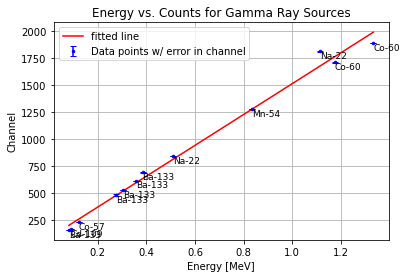

Linear fit: C = (1433.72106092+/-42.22219348)E + (81.29283737+/-42.22219348)


In [18]:
E_data = np.array([0.081, 0.088, 0.122, 0.276, 
                   0.303, 0.356, 0.384, 0.511, 
                   0.835, 1.115, 1.175, 1.333])

C_data = np.array([155.16810774, 166.37276477, 226.98617824, 
                   479.72620940, 526.84697657, 613.82722775,
                   690.00512348, 845.18251807, 1281.95949070, 
                   1814.11727851, 1712.56931386, 1895.20371921]) 

C_errors = np.array([0.16372205, 0.21175686, 0.07422393, 
                  7.95216302, 0.47711423, 0.17468657, 
                  3.58939626, 0.20642624, 0.32791821, 
                  1.01625214, 1.77457388, 1.07130561])

slope, intercept, r_value, p_value, std_err = stats.linregress(E_data, C_data)

result = stats.linregress(E_data, C_data)

data_labels = ['Ba-133', 'Cd-109', 'Co-57', 
               'Ba-133', 'Ba-133', 'Ba-133',
               'Ba-133', 'Na-22', 'Mn-54', 
               'Na-22', 'Co-60', 'Co-60']

for x, y, label in zip(E_data, C_data, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')

res = stats.linregress(E_data, C_data)
#plt.plot(E_data, C_data, '.', color='blue', label='data points')
plt.plot(E_data, res.intercept + res.slope*E_data, 'r', label='fitted line')
plt.errorbar(E_data, C_data, yerr=C_errors, fmt='.', color='blue', 
             label='Data points w/ error in channel', markersize=5, capsize=3)
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.title('Energy vs. Counts for Gamma Ray Sources')
plt.grid(True)
plt.legend()
plt.show()

print(f"Linear fit: C = ({res.slope:.8f}+/-{res.stderr:.8f})E + ({res.intercept:.8f}+/-{res.stderr:.8f})")

# Unknown: 

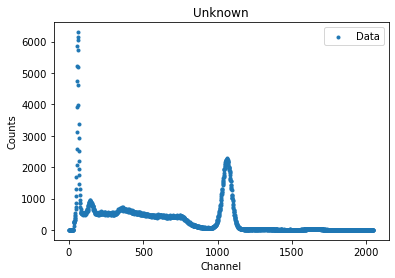

In [19]:
plt.scatter(x_data_7, y_data_7, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Unknown')
plt.legend()
plt.show()

### Peak 1 

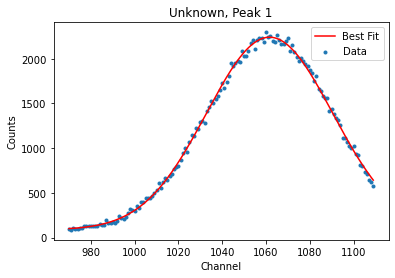

Peak 1 (unknown energy):

A1 = 2153.41312576 ± 8.87254175
B1 = 1061.63329082 ± 0.09615537
C1 = 28.77256160 ± 0.16118268
D = 87.13754939 ± 7.98805097


In [20]:
# peak 1

x_min = 970
x_max = 1110
A1 = 2450
B1 = 1065
C1 = 50
D = 50

params, covariance = curve_fit(fgaussian, x_data_7[x_min:x_max], y_data_7[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_7[x_min:x_max], y_data_7[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_7[x_min:x_max], fgaussian(x_data_7[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Unknown, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (unknown energy):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2

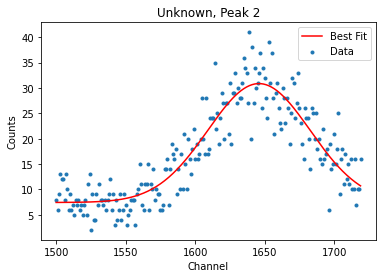

Peak 2 (unknown energy):

A2 = 23.46149116 ± 0.73459460
B2 = 1645.91803462 ± 1.08453648
C2 = 36.85754805 ± 1.53229522
D = 7.41019156 ± 0.54487215


In [21]:
# peak 2

x_min = 1500
x_max = 1720
A1 = 15
B1 = 1606
C1 = 40
D = 2

params, covariance = curve_fit(fgaussian, x_data_7[x_min:x_max], y_data_7[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_7[x_min:x_max], y_data_7[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_7[x_min:x_max], fgaussian(x_data_7[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Unknown, Peak 2')
plt.legend()
plt.show()

print('Peak 2 (unknown energy):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

## Linear fit with unknown quantities

* Unknown, peak 1:

$ (E_{1}, 1061.63329082 ± 0.09615537) $

* Unknown, peak 2: 

$ (E_{2}, 1645.91803462 ± 1.08453648) $

$ C = mE+b \rightarrow E = \frac{C - b}{m}$


In [22]:
C1 = 1061.63329082 # Channel number of Peak 1
C2 = 1645.91803462 # Channel number of Peak 2
m = 1433.72106092 # Slope from line of best fit
b = 81.29283737 # Intercept from line of best fit 
C1_error = 0.09615537
C2_error = 1.08453648
m_error = 42.22219348 # MeV^-1
b_error = 42.22219348 

partial_w_respect_to_C = 1/m
partial_w_respect_to_m_for_C1 = -(C1 - b)/m**2
partial_w_respect_to_m_for_C2 = -(C2 - b)/m**2
partial_w_respect_to_b = -1/m

# Energy for Peak 1
E1 = (C1 - b)/m 
E1_error = ((C1_error * partial_w_respect_to_C)**2 
           + (m_error * partial_w_respect_to_m_for_C1)**2 
           + (b_error * partial_w_respect_to_b)**2)**0.5 

# energy for peak 2
E2 = (C2 - b)/m
E2_error = ((C2_error * partial_w_respect_to_C)**2 
           + (m_error * partial_w_respect_to_m_for_C2)**2 
           + (b_error * partial_w_respect_to_b)**2)**0.5 

print(f'Peak 1 is at (E1, C1) = ({E1} ± {E1_error}, {C1} ± {C1_error})')
print()
print(f'Peak 2 is at (E2, C2) = ({E2} ± {E2_error}, {C2} ± {C2_error})')

Peak 1 is at (E1, C1) = (0.6837734899569156 ± 0.03567572297876387, 1061.63329082 ± 0.09615537)

Peak 2 is at (E2, C2) = (1.0913037688418978 ± 0.043597053628619035, 1645.91803462 ± 1.08453648)


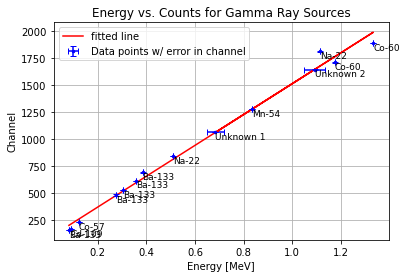

Linear fit: C = (1433.721+/-36.321)E + (81.293+/-36.321)


In [24]:
E_data = np.array([0.081, 0.088, 0.122, 0.276, 
                   0.303, 0.356, 0.384, 0.511, 
                   0.835, 1.115, 1.175, 1.333, 
                   0.6837734899569156, 1.0913037688418978])

C_data = np.array([155.16810774, 166.37276477, 226.98617824, 
                   479.72620940, 526.84697657, 613.82722775,
                   690.00512348, 845.18251807, 1281.95949070, 
                   1814.11727851, 1712.56931386, 1895.20371921,
                  1061.63329082, 1645.91803462])

C_errors = np.array([0.16372205, 0.21175686, 0.07422393, 
                  7.95216302, 0.47711423, 0.17468657, 
                  3.58939626, 0.20642624, 0.32791821, 
                  1.01625214, 1.77457388, 1.07130561,
                     0.09615537, 1.08453648])

E_errors = np.array([0, 0, 0,
                    0, 0, 0, 
                    0, 0, 0,
                    0, 0, 0,
                    0.03567572297876387, 
                     0.043597053628619035])

slope, intercept, r_value, p_value, std_err = stats.linregress(E_data, C_data)

result = stats.linregress(E_data, C_data)

data_labels = ['Ba-133', 'Cd-109', 'Co-57', 
               'Ba-133', 'Ba-133', 'Ba-133',
               'Ba-133', 'Na-22', 'Mn-54', 
               'Na-22', 'Co-60', 'Co-60', 
               'Unknown 1', 'Unknown 2']

for x, y, label in zip(E_data, C_data, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')

res = stats.linregress(E_data, C_data)
#plt.plot(E_data, C_data, '.', color='blue', label='data points')
plt.plot(E_data, res.intercept + res.slope*E_data, 'r', label='fitted line')
plt.errorbar(E_data, C_data, xerr=E_errors , yerr=C_errors, fmt='.', color='blue', 
             label='Data points w/ error in channel', markersize=5, capsize=3)
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.title('Energy vs. Counts for Gamma Ray Sources')
plt.grid(True)
plt.legend()
plt.show()

print(f"Linear fit: C = ({res.slope:.3f}+/-{res.stderr:.3f})E + ({res.intercept:.3f}+/-{res.stderr:.3f})")